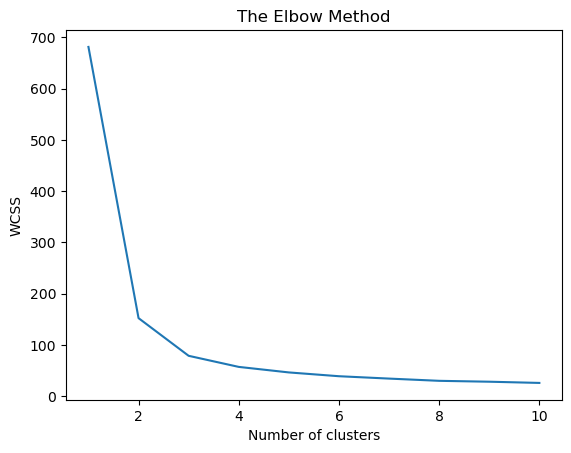

Time without PCA: 17.80556058883667 seconds
Accuracy without PCA: 0.9155714285714286
Time with PCA: 15.539270162582397 seconds
Accuracy with PCA: 0.9219285714285714


In [1]:
from sklearn.datasets import fetch_openml, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import time

# Load iris dataset
iris = load_iris()
X_iris = iris.data

# List to hold the WCSS for each k
wcss = []

# Range of k values to try
k_values = range(1, 11)

for i in k_values:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_iris)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(k_values, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1, return_X_y=True)
X_mnist, y_mnist = mnist

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply logistic regression without PCA
start = time.time()
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=1000)
logisticRegr.fit(X_train_scaled, y_train)
end = time.time()
time_without_pca = end - start
predictions = logisticRegr.predict(X_test_scaled)
accuracy_without_pca = accuracy_score(y_test, predictions)

# Apply PCA
pca = PCA(0.95) # retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Apply logistic regression with PCA
start = time.time()
logisticRegr_pca = LogisticRegression(solver = 'lbfgs', max_iter=1000)
logisticRegr_pca.fit(X_train_pca, y_train)
end = time.time()
time_with_pca = end - start
predictions_pca = logisticRegr_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, predictions_pca)

# Compare time with PCA and without PCA
print(f"Time without PCA: {time_without_pca} seconds")
print(f"Accuracy without PCA: {accuracy_without_pca}")
print(f"Time with PCA: {time_with_pca} seconds")
print(f"Accuracy with PCA: {accuracy_with_pca}")
